<font color='RED'><font size='6'>TP n°1: Introduction à python pour le calcul scientifique</font>


On importe numpy, time, pyplot de matplolib et pandas

In [158]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline


<font color='RED'><font size='5'>Exercice 1

In [159]:
from time import time

In [160]:
times = []

for i in range(2,1001):

    M1 = np.random.rand(i,i)
    M2 = np.random.rand(i,i)

    #Addition dans numpy
    t1 = time()
    M3 = np.add(M1,M2)
    t2 = time()

    #Notre fonction d'addition
    t3 = time()
    M4 = [i + j for i,j in zip(M1,M2)]
    t4 = time()

    times.append([i,t2-t1,t4-t3])

On met les données dans une dataframe

In [161]:
df = pd.DataFrame(times, columns=['matrix_size','numpy_add', 'custom_add'], dtype=float)
df.set_index('matrix_size')

,numpy_add,custom_add
matrix_size,,
2.0,0.000074,0.031083
3.0,0.000015,0.000076
4.0,0.000006,0.000015
5.0,0.000006,0.000136
6.0,0.000006,0.000016
...,...,...
996.0,0.005692,0.007145
997.0,0.001375,0.003906
998.0,0.001257,0.004193


On trace le graphe

<Axes: xlabel='matrix_size'>

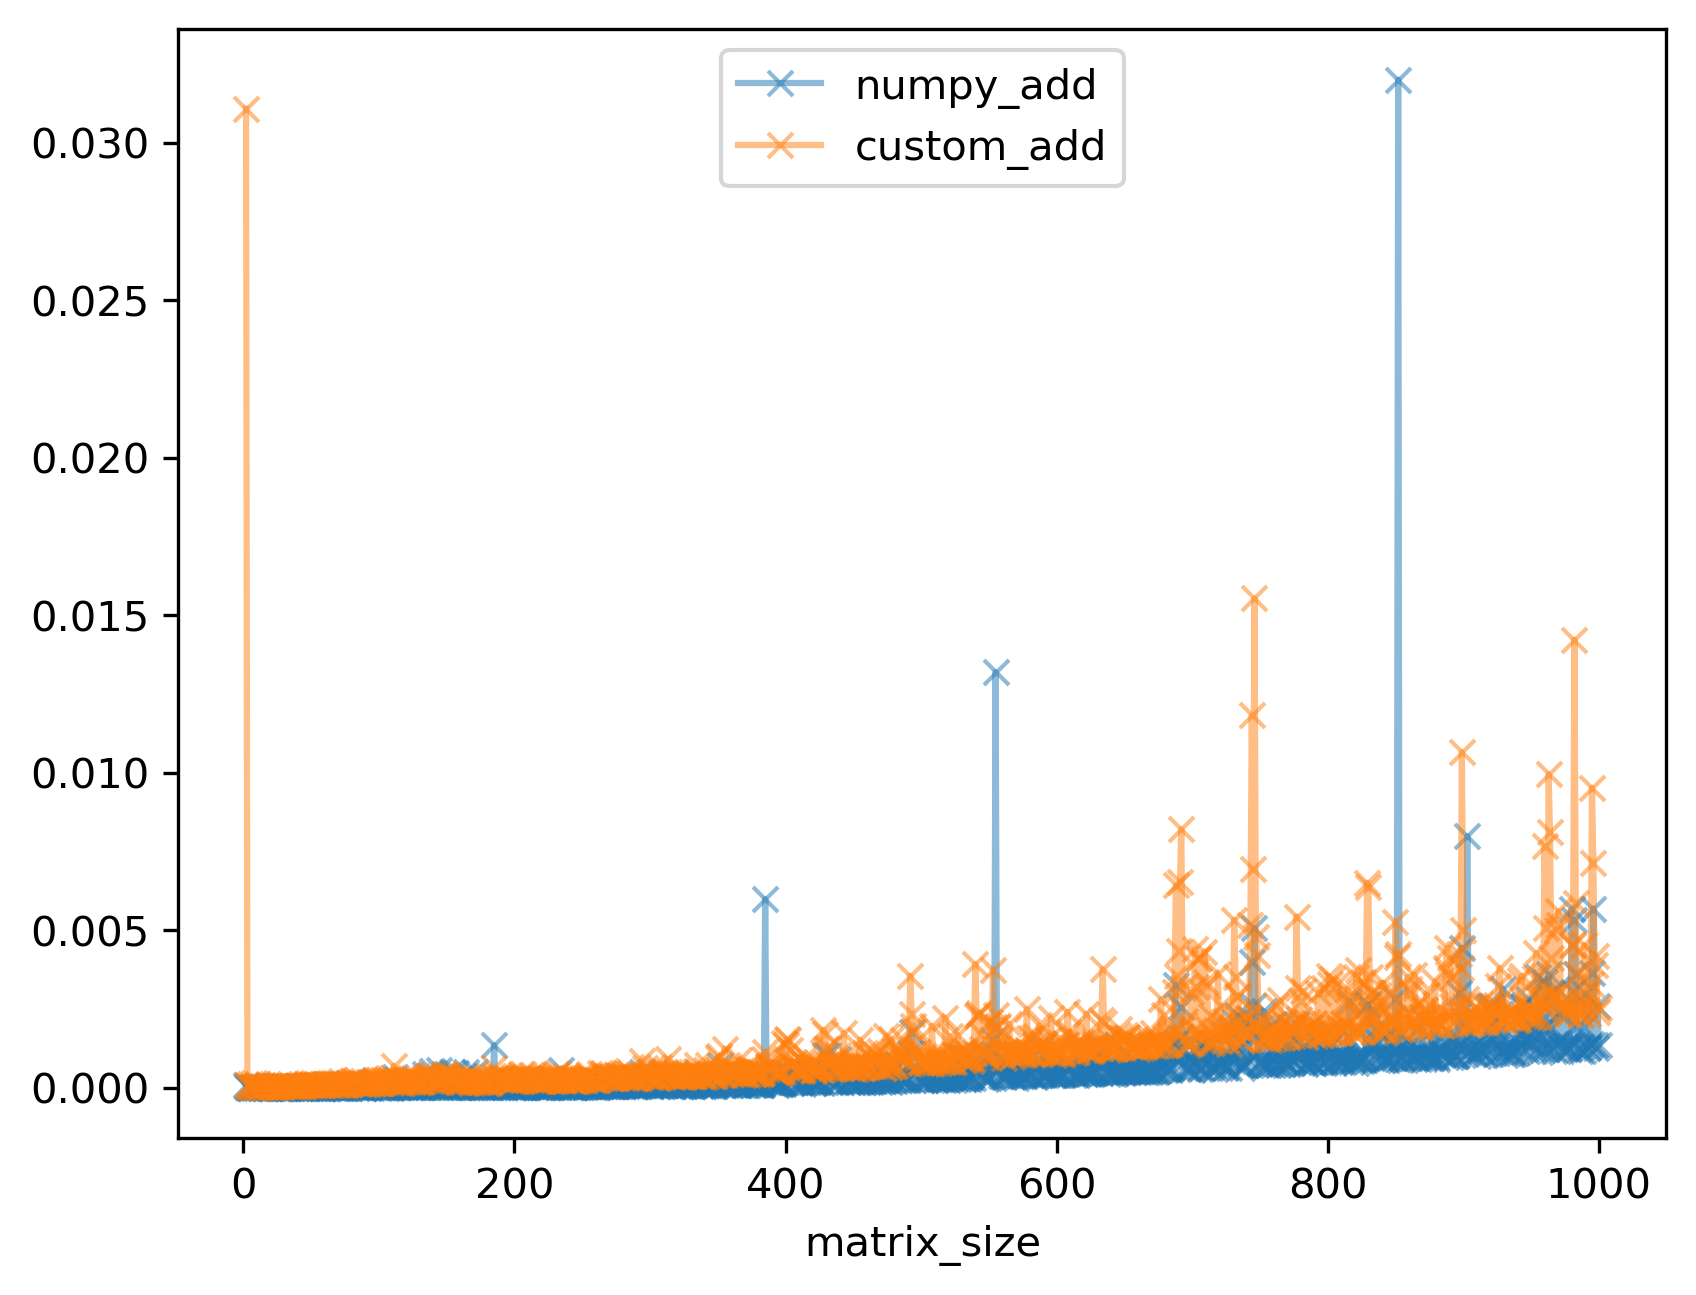

In [162]:
# Plotting graph
fig, ax = plt.subplots(dpi = 300, nrows=1)

df.plot(kind = 'line', x='matrix_size', marker='x',alpha=0.5, ax=ax)

Le graphe est peu lisible, retirons les outliers 

In [163]:
mean_numpy = df.numpy_add.mean()
std_numpy = df.numpy_add.std()

mean_custom = df.custom_add.mean()
std_custom = df.custom_add.std()

df = df[(df.numpy_add < mean_numpy + std_numpy*2) & (df.custom_add < mean_custom + std_custom*2)]

<Axes: xlabel='matrix_size'>

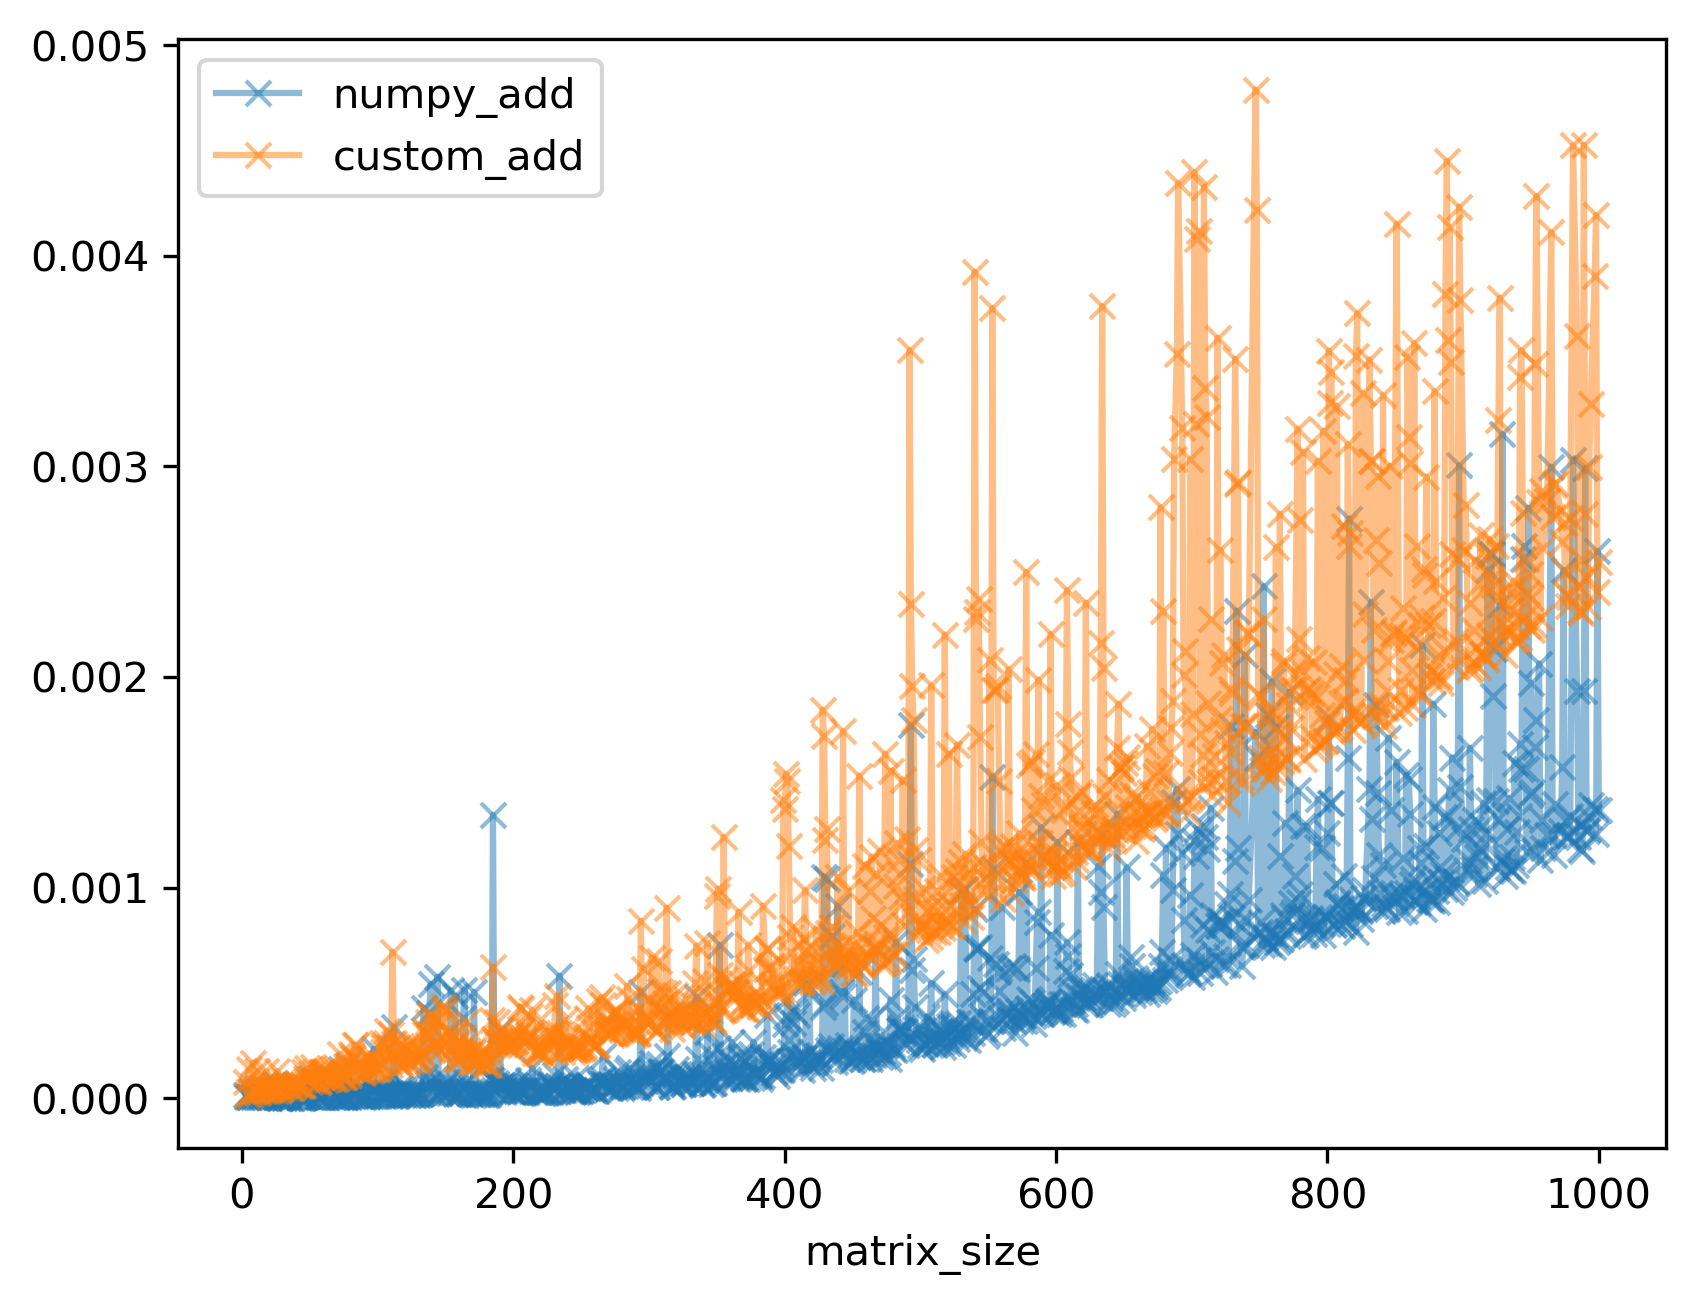

In [164]:
# Plotting graph
fig, ax = plt.subplots(dpi = 300, nrows=1)

df.plot(kind = 'line', x='matrix_size', marker='x',alpha=0.5, ax=ax)

On voit que la fonction add de numpy est environ deux fois plus rapide que les deux boucles imbriquées pour des matrices de taille 1000x1000

<font color='RED'><font size='5'>Exercice 2

In [165]:
from numpy.polynomial import Polynomial as P

La fonction ci-dessous est inspirée de la fonction polycompanion de numpy.polynomial

In [166]:
def comp(P):
   
    P = np.array(P.coef, dtype=float)
    if len(P) < 2:
        return np.array(-P[0])
    if len(P) == 2:
        return np.array([[-P[0]/P[1]]])

    n = len(P) - 1
    mat = np.zeros((n, n), dtype=P.dtype)
    bot = mat.reshape(-1)[n::n+1]
    bot[...] = 1                #bot est une vue de mat donc on modifie mat en modifiant bot
    mat[:, -1] = -P[:-1]/P[-1]  #On modifie la dernière colonne de la matrice en normalisant les coefficients

    return mat

In [167]:
p=P([1,-2,0,1])


In [168]:
comp(p)

array([[ 0.,  0., -1.],
       [ 1.,  0.,  2.],
       [ 0.,  1., -0.]])

In [169]:
type(comp(p))

numpy.ndarray

<font color='RED'><font size='5'>Exercice 3

On fait en sorte de voir toutes les colonnes des données

In [170]:
pd.set_option('display.max_columns', None)

On importe les deux csv dont on a besoin pour le problème

In [171]:
df3 = pd.read_csv("all_womens_foil_fencer_bio_data_May_13_2021_cleaned.csv", on_bad_lines = 'skip', sep=',',dtype=str)
df4 = pd.read_csv("all_womens_foil_fencer_rankings_data_May_13_2021_cleaned.csv", on_bad_lines = 'skip', sep=',',dtype=str)

On cherche les athlètes avec ces caractéristiques : FR, top 16, sénior, 2003-2022

On fusionne les deux dataframes dont on va avoir besoin en fonction de l'id unique des athlètes

In [172]:
df4 = df4.merge(df3, how='left', on='id')

On s'assure que le type des colonnes dont on va avoir besoin est correct

In [173]:
df4["category"] = df4.category.astype("str")
df4["season"] = df4.season.astype("str")
df4["country_code"] = df4.country_code.astype("str")
df4['rank'] = pd.to_numeric(df4['rank'])

On applique le filtre demandé

In [174]:
df5 = df4.loc[(df4.country_code == 'FRA') & (df4.category=='Senior') & (df4['rank'] <= 16)]

On créé une nouvelle dataframe avec moins de colonnes

In [175]:
df6 = df5[['id','rank', 'season','name']]


In [176]:
df6.head(10)

,id,rank,season,name
166,2860,16,2009/2010,GUYART Astrid
167,2860,11,2010/2011,GUYART Astrid
169,2860,5,2012/2013,GUYART Astrid
170,2860,9,2013/2014,GUYART Astrid
172,2860,12,2015/2016,GUYART Astrid
173,2860,8,2016/2017,GUYART Astrid
174,2860,11,2017/2018,GUYART Astrid
180,2928,8,2005/2006,MAITREJEAN Corinne
181,2928,13,2006/2007,MAITREJEAN Corinne
183,2928,7,2008/2009,MAITREJEAN Corinne


In [177]:
df6.nunique()

id         5
rank      13
season    17
name       5
dtype: int64

On utilise l'ID unique comme index de la dataframe. On s'assure qu'il est bien considéré comme entier, tout comme le rang.

In [178]:
df6['id'] = pd.to_numeric(df6['id'])
df6.index = df6.id
df6['rank'] = pd.to_numeric(df6['rank'])
df6 = df6.drop(['id'], axis=1)

/tmp/ipykernel_2589/1721504573.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['id'] = pd.to_numeric(df6['id'])
/tmp/ipykernel_2589/1721504573.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['rank'] = pd.to_numeric(df6['rank'])


In [179]:
df6.dtypes

rank       int64
season    object
name      object
dtype: object

On créé un tableau croisé où l'index est la saison, les colonnes les noms des athlètes et les valeurs leur classement

In [180]:
df7 = pd.pivot_table(df6, index = df6.season, columns = df6.name, values = 'rank')

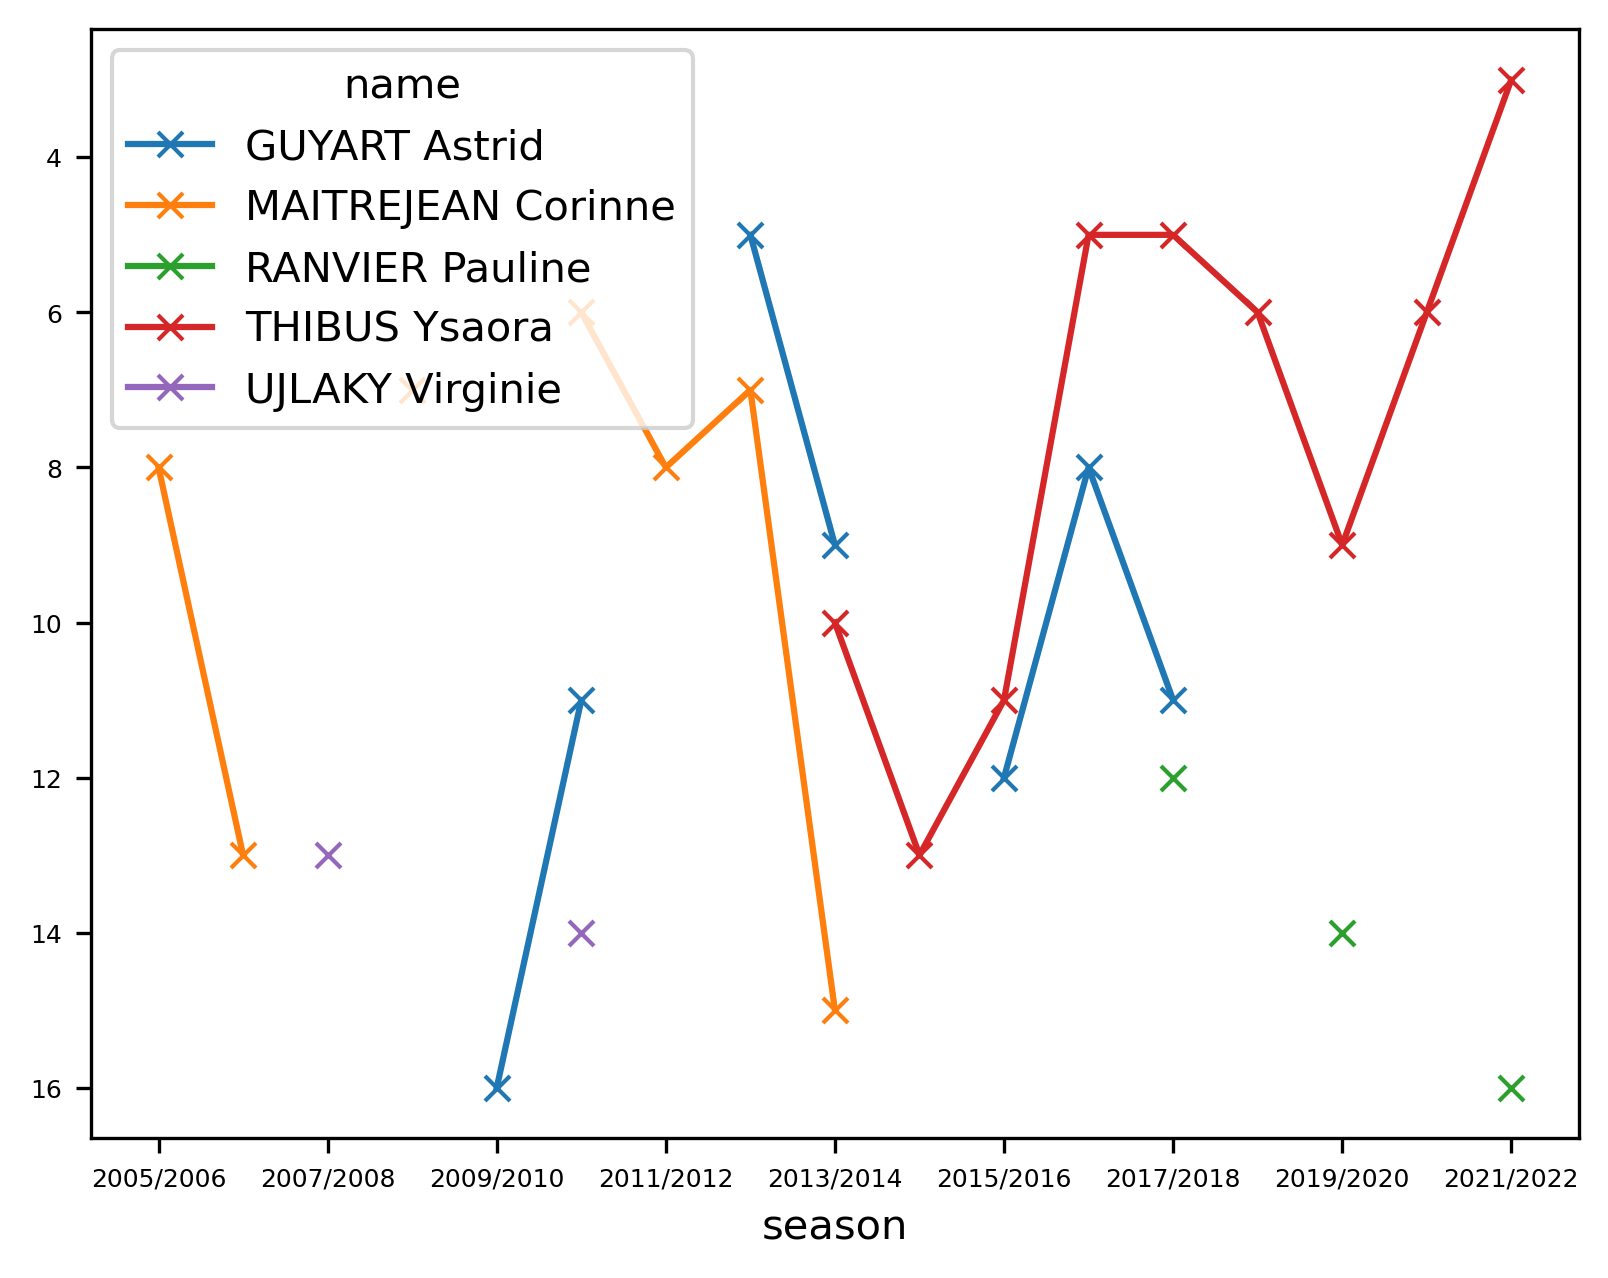

In [181]:
fig, ax = plt.subplots(dpi = 300, nrows=1)

df7.plot(marker = 'x', ax=ax, fontsize = 6)
ax = ax.invert_yaxis()

<font color='RED'><font size='5'>Exercice 4

In [182]:
import seaborn as sns

Question 1

In [183]:
df = sns.load_dataset('penguins')

Question 2

In [184]:
df.nunique()

species                3
island                 3
bill_length_mm       164
bill_depth_mm         80
flipper_length_mm     55
body_mass_g           94
sex                    2
dtype: int64

In [185]:
df.count()

species              344
island               344
bill_length_mm       342
bill_depth_mm        342
flipper_length_mm    342
body_mass_g          342
sex                  333
dtype: int64

Il manque des valeurs pour certaines features, on supprime ces lignes

In [186]:
df = df.dropna()

On va afficher un violin plot pour chaque feature

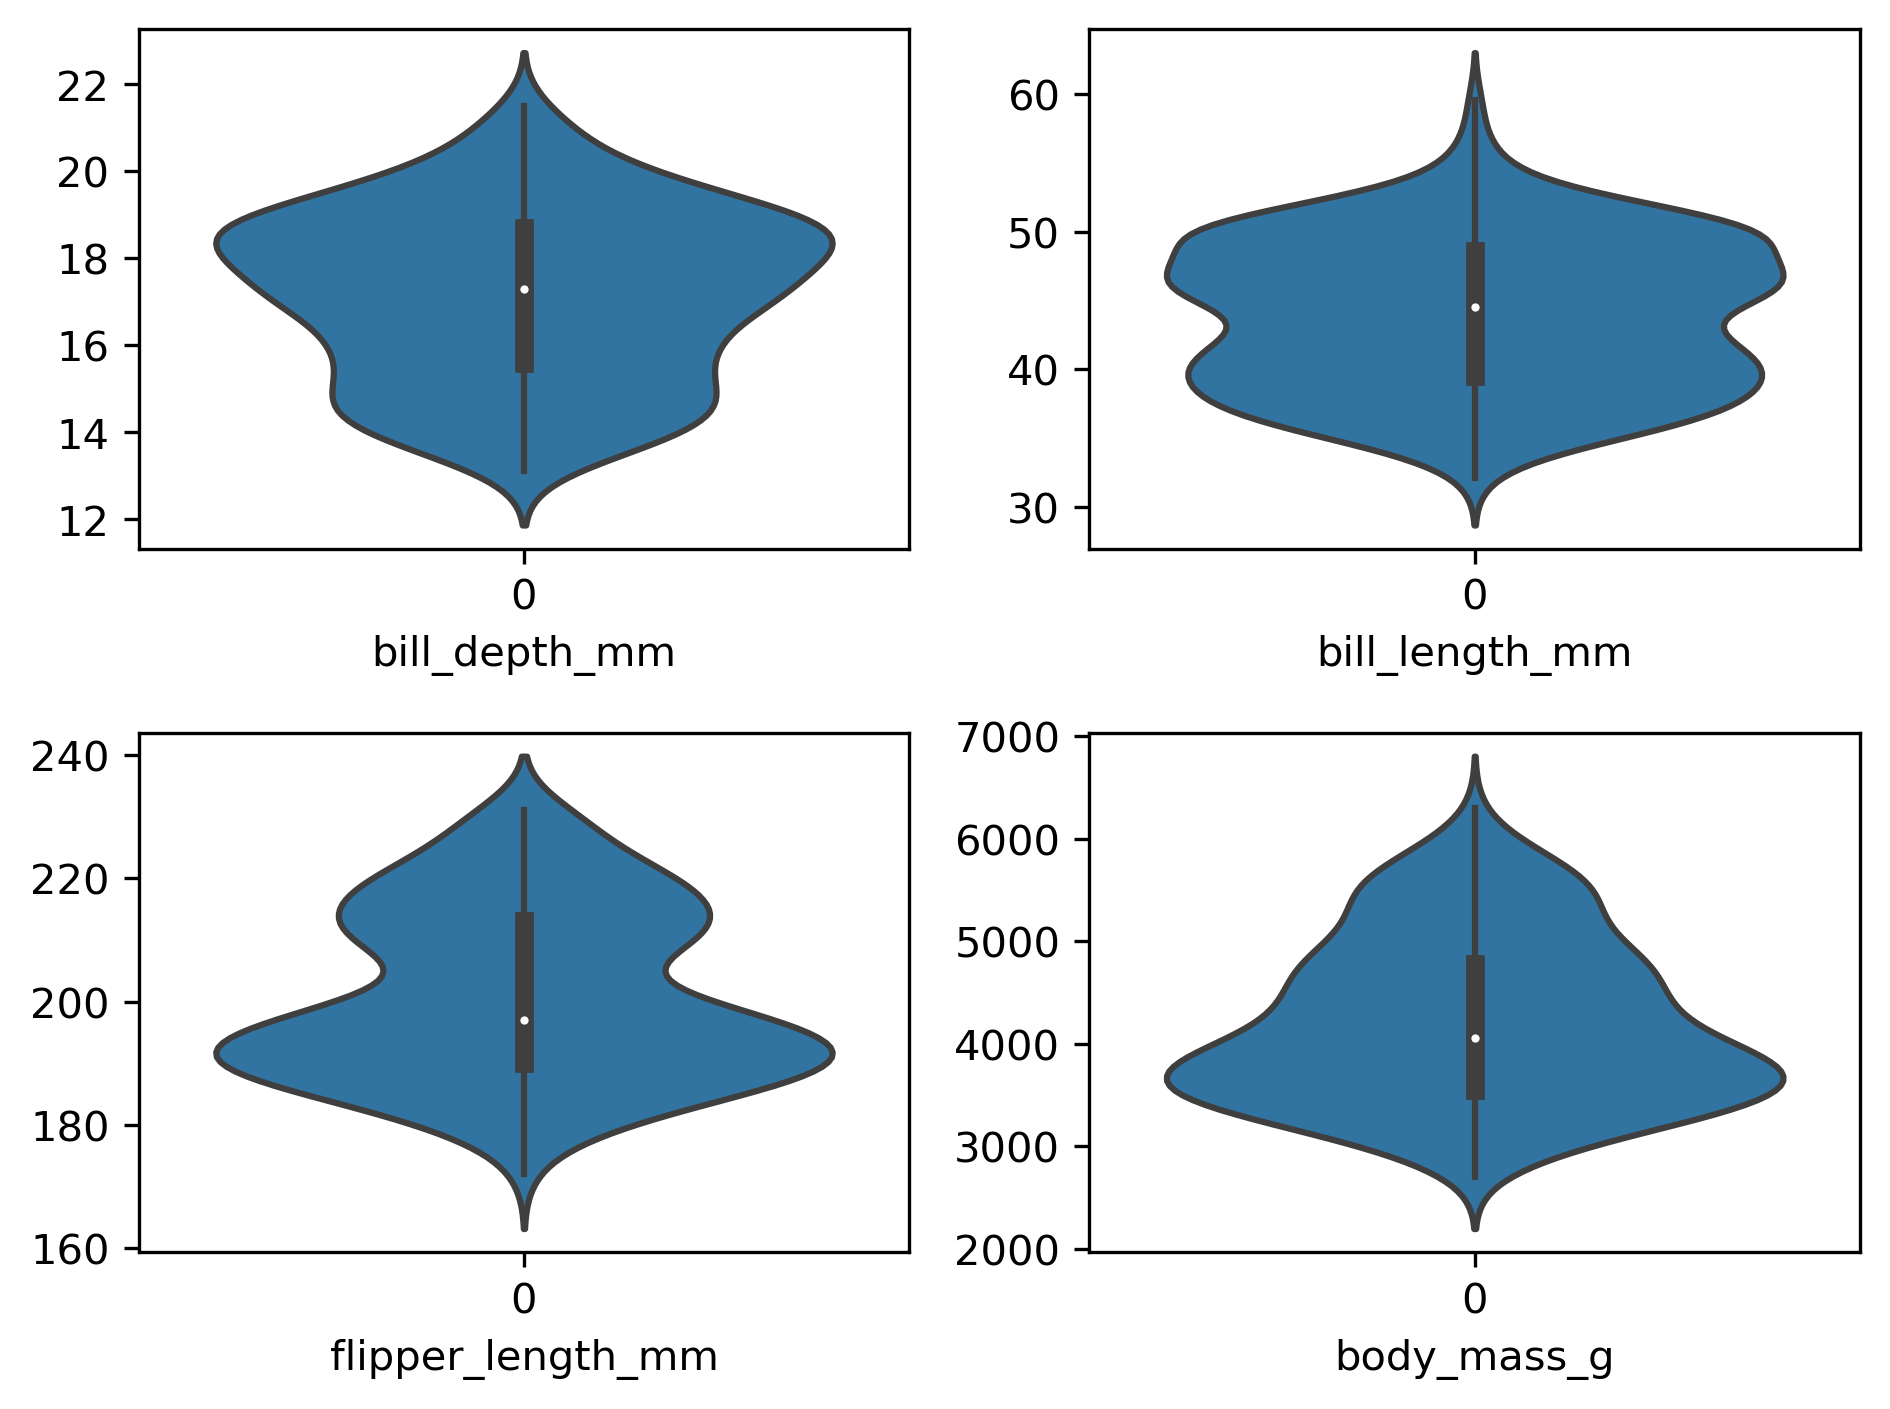

In [187]:
fig, axs = plt.subplots(dpi = 300, nrows = 2, ncols=2) 

#Hauteur du bec
sns.violinplot(df['bill_depth_mm'], ax=axs[0,0])
axs[0,0].set_xlabel('bill_depth_mm')

#Longueur du bec
sns.violinplot(df['bill_length_mm'], ax=axs[0,1])
axs[0,1].set_xlabel('bill_length_mm')

#Longueur de la nageoire
sns.violinplot(df['flipper_length_mm'], ax=axs[1,0])
axs[1,0].set_xlabel('flipper_length_mm')

#Poids du penguin
sns.violinplot(df['body_mass_g'], ax=axs[1,1])
axs[1,1].set_xlabel('body_mass_g')

plt.tight_layout()

Question 3

<Axes: >

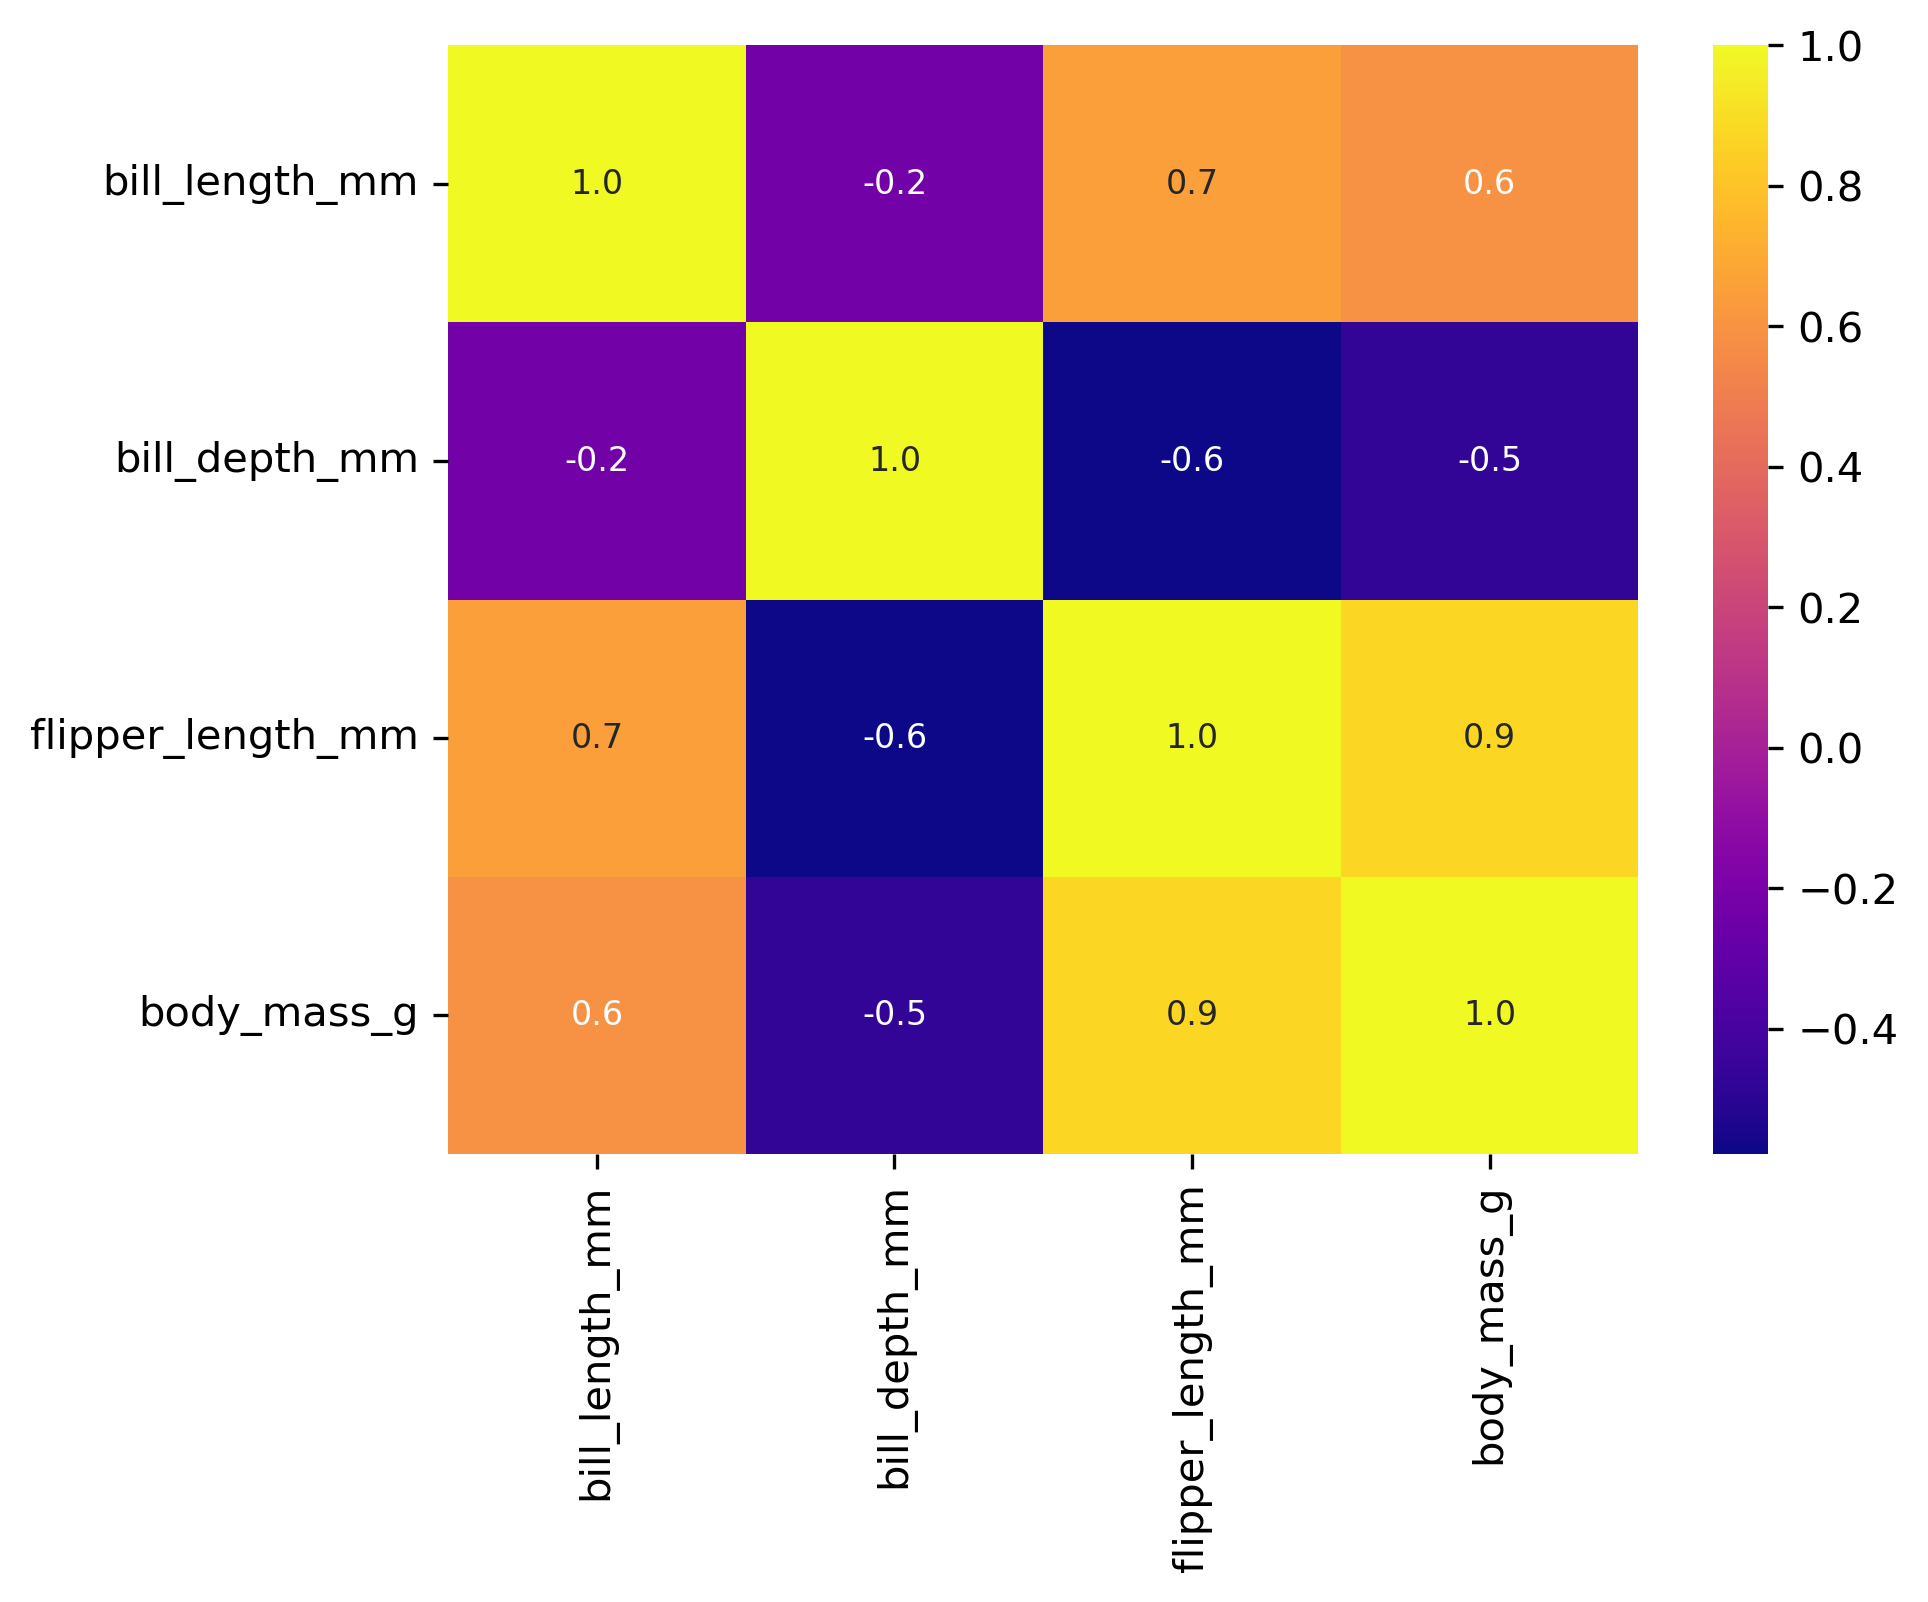

In [188]:
fig, ax = plt.subplots(dpi = 300) 

sns.heatmap(df.corr(numeric_only=True), cmap='plasma', annot=True,fmt=".1f",annot_kws={"fontsize":8}, ax=ax)

On peut voir que la longueur de la nageoire est fortement corrélée à la masse du pengouin. La longueur du bec et celle de la nageoire le sont également.

Question 4

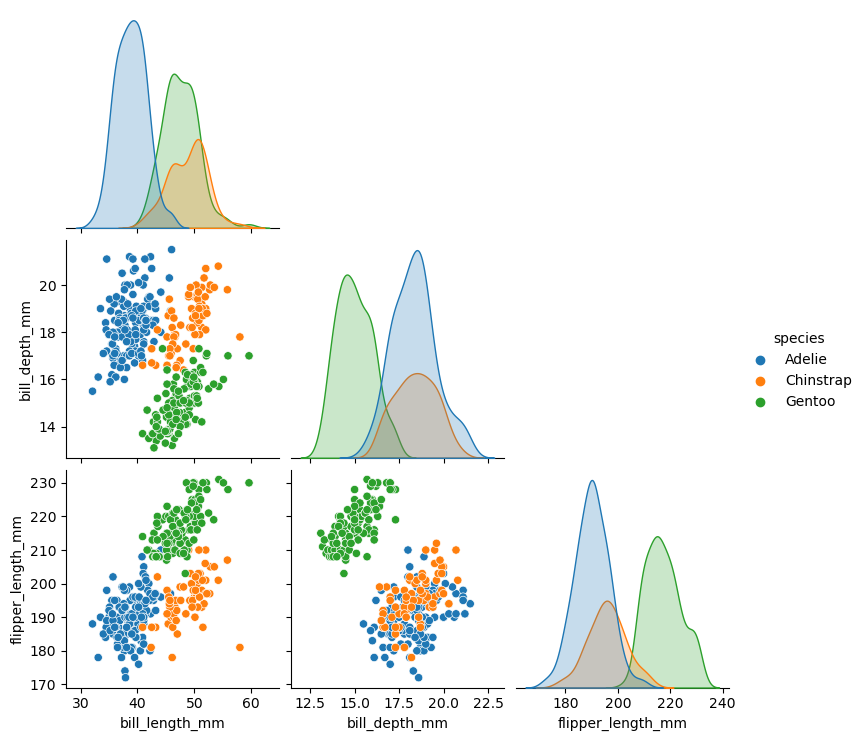

In [189]:
sns.pairplot(df.drop(["body_mass_g"],axis=1), hue = 'species', corner=True)

Remarques :

-La hauteur du bec est similaire pour Adelie et Chinstrap

-La longueur du bec est similaire pour Chinstrap et Gentoo

On peut séparer les espèces de la meilleure façon avec la longueur du bec et la longueur de la nageoire
On voit bien les 3 clusters, on pourrait penser à réduire la dimension des données pour ne conserver que ces deux features, dans le but d'utiliser un algorithme de clustering ou d'entrainer un modèle de machine learning, bien que ce soit inutile ici vu la faible taille des données